<a href="https://colab.research.google.com/github/Juricasfi/IA/blob/main/Clasificaci%C3%B3n_binaria_Rese%C3%B1asPeliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importar los datos de las reseñas de peliculas

num_words = toma las 10000 palabras más frecuentes en las reseñas


decodificar los valores (numeros) en la letra correspondiente y unirlos en un texto (decoded_review)

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

decoded_review


1641221/1641221 [==============================] - 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

ya que no se puede ingresar la lista de enteros  a la red neuronal lo que se hace es arreglar los conjuntos de datos para que todos tengan la misma longitud o se realiza un vector de 10000 donde la secuencia [8,5] está todo el vector de 10000 en cero menos los indices 8 y 5(Multi-hot encoding)

Se codifica la secuencia de números entera mediante multi-hot encoding

In [3]:
import numpy as np


## vectorizar los datos de entrada

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Vectorizar las salidas

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_test


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [6]:
## Se implementa la red neuronal, las primras dos capas con 16 unidades cada una y la tercera capa con una que me de una salida escalar

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16,activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
                          ])

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [9]:
## Entrenar el modelo

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 75ms/step - loss: 0.0154 - accuracy: 0.9986 - val_loss: 0.5563 - val_accuracy: 0.8709
Epoch 2/20
30/30 [==============================] - 3s 105ms/step - loss: 0.0136 - accuracy: 0.9987 - val_loss: 0.5806 - val_accuracy: 0.8693
Epoch 3/20
30/30 [==============================] - 3s 107ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.6065 - val_accuracy: 0.8689
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0125 - accuracy: 0.9979 - val_loss: 0.6216 - val_accuracy: 0.8685
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0080 - accuracy: 0.9993 - val_loss: 0.7080 - val_accuracy: 0.8617
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0065 - accuracy: 0.9998 - val_loss: 0.6761 - val_accuracy: 0.8644
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.6845 - val_accuracy: 0.8660
Epoch 8/20


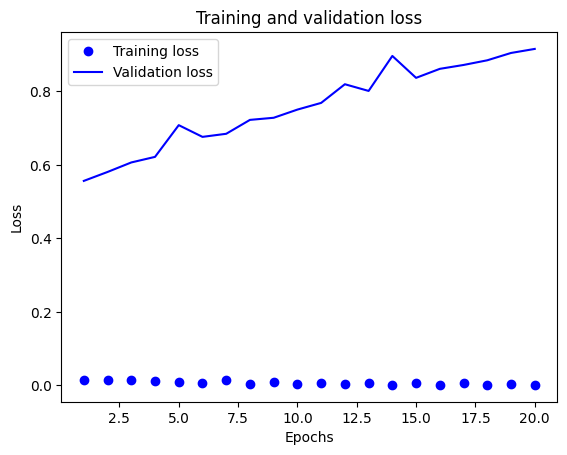

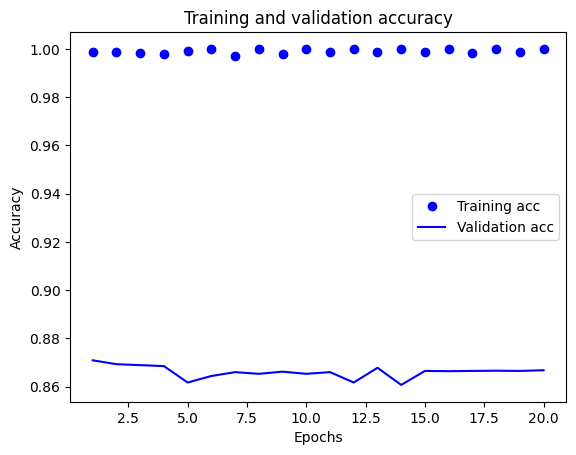

In [10]:
## Graficas

# plot training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Epoch 1/5
30/30 [==============================] - 4s 104ms/step - loss: 0.5541 - accuracy: 0.7821 - val_loss: 0.4297 - val_accuracy: 0.8588
Epoch 2/5
30/30 [==============================] - 1s 44ms/step - loss: 0.3529 - accuracy: 0.8888 - val_loss: 0.3342 - val_accuracy: 0.8780
Epoch 3/5
30/30 [==============================] - 1s 39ms/step - loss: 0.2626 - accuracy: 0.9103 - val_loss: 0.2945 - val_accuracy: 0.8855
Epoch 4/5
30/30 [==============================] - 1s 39ms/step - loss: 0.2098 - accuracy: 0.9306 - val_loss: 0.3002 - val_accuracy: 0.8766
Epoch 5/5
30/30 [==============================] - 1s 40ms/step - loss: 0.1762 - accuracy: 0.9422 - val_loss: 0.2757 - val_accuracy: 0.8873


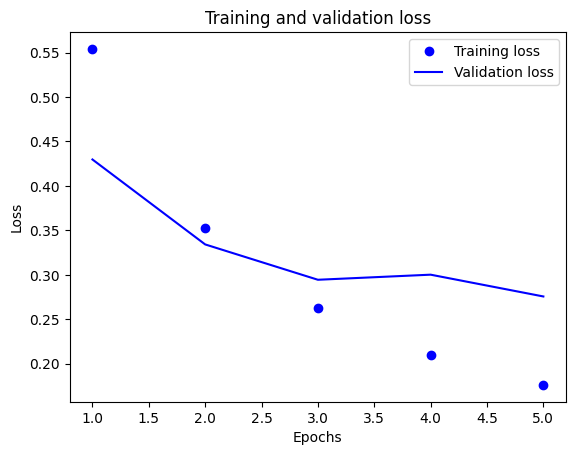

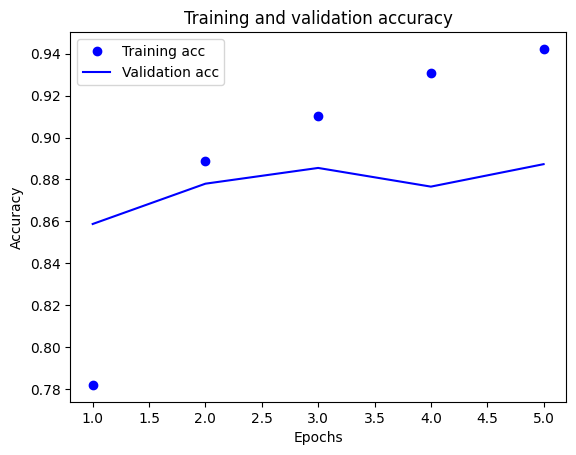

In [11]:
## Realizar en entrenamiento con 5 epocas

model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16,activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
                          ])

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 5,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()